# Классификация фруктов
20 видов фруктов с указанием размера, цвета, вкуса и цены для машинного обучения.

# О наборе данных
📘О наборе данных

Этот набор данных был тщательно подобран, чтобы помочь учащимся и специалистам-практикам изучить классификацию фруктов с помощью машинного обучения.
Он содержит подробную информацию о 20 видах фруктов, каждый из которых описан с учётом физических и сенсорных характеристик, таких как размер, форма, вес, цвет и вкус.
Каждая строка представляет собой один фрукт (или одну группу фруктов, например бананы) с его реалистичными характеристиками.

🧩 Характеристики
Описание столбца
размер (см) Средний размер или диаметр плода в сантиметрах
форма Общая форма плода (круглая, овальная, продолговатая и т. д.)
вес (г) Вес одного плода или группы плодов в граммах
avg_price (₹) Средняя рыночная цена в индийских рупиях
цвет Преобладающий цвет плода
вкус Основной вкусовой профиль (сладкий, кислый, терпкий и т. д.)
fruit_name Целевая переменная — фактическое название плода
🎯 Назначение

Этот набор данных идеально подходит для:

практики в создании моделей контролируемой классификации

проведения EDA (исследовательского анализа данных)

понимания важности признаков в случайных лесах или деревьях решений

создания простых для новичков проектов по машинному обучению для резюме или портфолио

🧠 Пример эффективности модели
Точность алгоритма при обучении Точность при тестировании
Классификатор на основе случайного леса 1,00 1,00

# Задача

Задача состоит в том, чтобы предсказать название фрукта на основе измеримых характеристик.
Пример модели случайного леса, обученной на этом наборе данных, показал идеальную точность (1,0) как на обучающих, так и на тестовых данных. Это говорит о том, что признаки понятны, хорошо сбалансированы и значимы для задач классификации.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('fruit_classification_dataset.csv')

После выполнения мы посмотрим на структуру данных. Я импортировал библиотеки Pandas для работы с табличными данными и NumPy для математических операций, затем загрузил датасет с фруктами в переменную df.

In [23]:
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


Смотрю первые 5 строк данных чтобы понять структуру таблицы - какие столбцы есть, какие типы данных, примеры значений фруктов. Это поможет планировать дальнейшую обработку.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


Проверяю подробную информацию о данных: типы столбцов, количество записей, наличие пропущенных значений. Это важно чтобы понять какие преобразования нужны.
Данные чистые - нет пропущенных значений, 10000 записей, 3 числовых и 4 текстовых столбца.

In [25]:
df.duplicated().sum()

np.int64(246)

Проверяю наличие полных дубликатов - одинаковых строк. Если найду, нужно будет удалить чтобы не искажать анализ.

In [26]:
df.drop_duplicates(inplace=True)
len(df)

9754

Удаляю полные дубликаты и показываю сколько записей осталось.

In [27]:
df.describe()

,size (cm),weight (g),avg_price (₹)
count,9754.000000,9754.000000,9754.000000
mean,8.611195,466.779209,78.423621
std,6.372831,737.286782,38.324394
min,0.900000,4.500000,9.000000
25%,4.000000,47.600000,49.000000
50%,7.300000,177.200000,76.300000
75%,10.200000,375.650000,101.700000
max,27.500000,3299.800000,165.000000


Смотрю статистику по числовым признакам: размер, вес и цена. Это покажет диапазоны значений, средние, медианы - поможет выявить потенциальные аномалии для обработки.

In [28]:
df['fruit_name'].value_counts()

fruit_name
pomegranate      534
pear             534
pineapple        533
custard apple    516
papaya           509
kiwi             506
banana           502
coconut          502
mango            500
watermelon       498
dragon fruit     496
lychee           495
apple            492
plum             489
orange           484
guava            481
cherry           462
blueberry        443
strawberry       432
grape            346
Name: count, dtype: int64

Смотрю распределение фруктов по количеству. Это поможет понять сбалансированность данных и какие фрукты преобладают в датасете.

In [29]:
shape_mapping = {shape: i for i, shape in enumerate(df['shape'].unique())}
color_mapping = {color: i for i, color in enumerate(df['color'].unique())}  
taste_mapping = {taste: i for i, taste in enumerate(df['taste'].unique())}
fruit_mapping = {fruit: i for i, fruit in enumerate(df['fruit_name'].unique())}

df['shape_encoded'] = df['shape'].map(shape_mapping)
df['color_encoded'] = df['color'].map(color_mapping)
df['taste_encoded'] = df['taste'].map(taste_mapping) 
df['fruit_encoded'] = df['fruit_name'].map(fruit_mapping)

df[['shape', 'shape_encoded', 'color', 'color_encoded', 'taste', 'taste_encoded']].head()

,shape,shape_encoded,color,color_encoded,taste,taste_encoded
0,round,0,green,0,sweet,0
1,round,0,green,0,sweet,0
2,round,0,green,0,sweet,0
3,oval,1,orange,1,sweet,0
4,long,2,yellow,2,sweet,0


Создаю словари для кодирования и сразу применяю их к данным. Теперь категориальные признаки преобразованы в числа.

In [30]:
numerical_cols = ['size (cm)', 'weight (g)', 'avg_price (₹)', 'shape_encoded', 'color_encoded', 'taste_encoded', 'fruit_encoded']
df[numerical_cols].head()

,size (cm),weight (g),avg_price (₹),shape_encoded,color_encoded,taste_encoded,fruit_encoded
0,25.4,3089.2,137.1,0,0,0,0
1,24.6,3283.9,163.8,0,0,0,0
2,7.8,319.0,91.3,0,0,0,1
3,20.0,1607.0,85.7,1,1,0,2
4,10.2,131.5,37.8,2,2,0,3


Выделяю все числовые признаки которые будем нормализовать: исходные размер, вес, цена и закодированные категории. Смотрю их текущие значения перед нормализацией.

In [31]:
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)

df[[col + '_normalized' for col in numerical_cols]].head()

,size (cm)_normalized,weight (g)_normalized,avg_price (₹)_normalized,shape_encoded_normalized,color_encoded_normalized,taste_encoded_normalized,fruit_encoded_normalized
0,0.921053,0.936091,0.821154,0.0,0.000000,0.0,0.000000
1,0.890977,0.995175,0.992308,0.0,0.000000,0.0,0.000000
2,0.259398,0.095439,0.527564,0.0,0.000000,0.0,0.052632
3,0.718045,0.486299,0.491667,0.5,0.142857,0.0,0.105263
4,0.349624,0.038540,0.184615,1.0,0.285714,0.0,0.157895


Провожу нормализацию Min-Max: привожу все числовые признаки к диапазону [0, 1] по формуле (x - min) / (max - min). Теперь все признаки в одном масштабе.

In [32]:
normalized_cols = [col + '_normalized' for col in numerical_cols]
df[normalized_cols].describe()

,size (cm)_normalized,weight (g)_normalized,avg_price (₹)_normalized,shape_encoded_normalized,color_encoded_normalized,taste_encoded_normalized,fruit_encoded_normalized
count,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000
mean,0.289895,0.140284,0.445023,0.279885,0.446630,0.152450,0.499277
std,0.239580,0.223739,0.245669,0.295548,0.340511,0.278655,0.303943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116541,0.013079,0.256410,0.000000,0.142857,0.000000,0.210526
50%,0.240602,0.052408,0.431410,0.500000,0.428571,0.000000,0.526316
75%,0.349624,0.112630,0.594231,0.500000,0.857143,0.500000,0.736842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Проверяю статистику нормализованных данных чтобы убедиться что все признаки действительно в диапазоне [0, 1] и готовы для анализа. Минимум должен быть 0, максимум 1.

In [33]:
df[normalized_cols].min()

size (cm)_normalized        0.0
weight (g)_normalized       0.0
avg_price (₹)_normalized    0.0
shape_encoded_normalized    0.0
color_encoded_normalized    0.0
taste_encoded_normalized    0.0
fruit_encoded_normalized    0.0
dtype: float64

Проверяю минимальные значения нормализованных признаков. Должны быть 0 для всех столбцов.

In [34]:
df[normalized_cols].max()

size (cm)_normalized        1.0
weight (g)_normalized       1.0
avg_price (₹)_normalized    1.0
shape_encoded_normalized    1.0
color_encoded_normalized    1.0
taste_encoded_normalized    1.0
fruit_encoded_normalized    1.0
dtype: float64

Проверяю максимальные значения нормализованных признаков. Должны быть 1 для всех столбцов.

In [35]:
df.to_csv('normalized_fruit_data.csv', index=False)

Сохраняю обработанные данные в новый CSV файл. Параметр index=False убирает сохранение индексов строк чтобы файл был чище. Теперь у нас есть нормализованная версия датасета где все числовые признаки масштабированы к диапазону [0,1] и категориальные признаки закодированы числами, что делает данные готовыми для машинного обучения и статистического анализа.

In [36]:
len(df)

9754

In [37]:
len(normalized_cols)

7

# Нормализация выполнена
Нормализация данных завершена. Исходный датасет содержал 10000 записей, после удаления 246 дубликатов осталось 9754 уникальных записи. Были закодированы категориальные признаки (shape, color, taste, fruit_name) в числовые значения и проведена нормализация Min-Max для всех числовых признаков включая исходные (size, weight, price) и закодированные категории. Все 7 нормализованных признаков теперь находятся в диапазоне [0, 1]. Обработанные данные сохранены в файл normalized_fruit_data.csv и готовы для дальнейшего анализа и машинного обучения.

In [38]:
df.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name,shape_encoded,color_encoded,taste_encoded,fruit_encoded,size (cm)_normalized,weight (g)_normalized,avg_price (₹)_normalized,shape_encoded_normalized,color_encoded_normalized,taste_encoded_normalized,fruit_encoded_normalized
0,25.4,round,3089.2,137.1,green,sweet,watermelon,0,0,0,0,0.921053,0.936091,0.821154,0.0,0.000000,0.0,0.000000
1,24.6,round,3283.9,163.8,green,sweet,watermelon,0,0,0,0,0.890977,0.995175,0.992308,0.0,0.000000,0.0,0.000000
2,7.8,round,319.0,91.3,green,sweet,custard apple,0,0,0,1,0.259398,0.095439,0.527564,0.0,0.000000,0.0,0.052632
3,20.0,oval,1607.0,85.7,orange,sweet,papaya,1,1,0,2,0.718045,0.486299,0.491667,0.5,0.142857,0.0,0.105263
4,10.2,long,131.5,37.8,yellow,sweet,banana,2,2,0,3,0.349624,0.038540,0.184615,1.0,0.285714,0.0,0.157895


# Разведочный анализ данных(EDA)

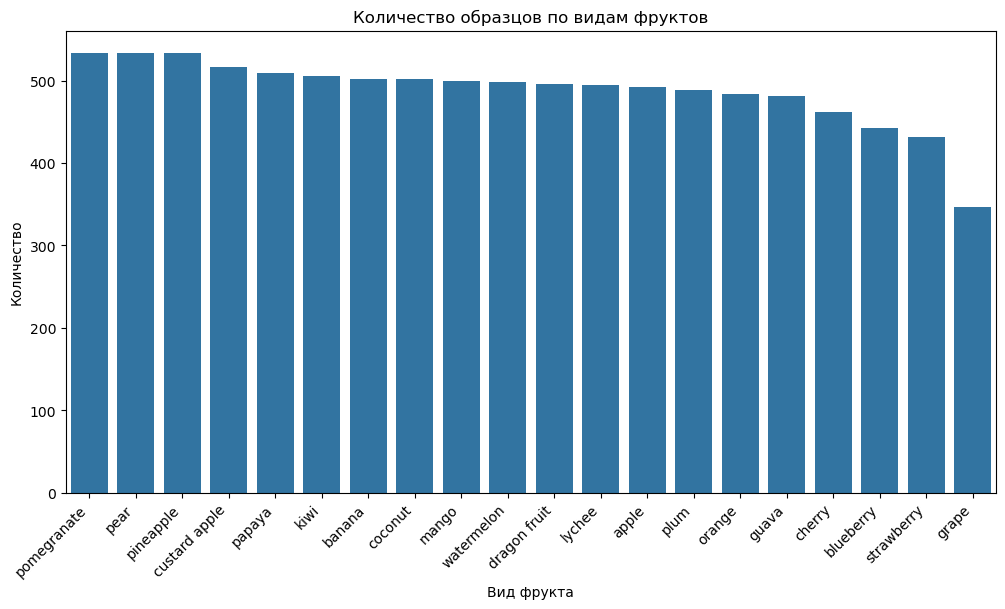

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='fruit_name', order=df['fruit_name'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Количество образцов по видам фруктов')
plt.xlabel('Вид фрукта')
plt.ylabel('Количество')
plt.show()

По данному графику мы можем увидеть, какие фрукты представлены в большем количестве, а какие - в меньшем.

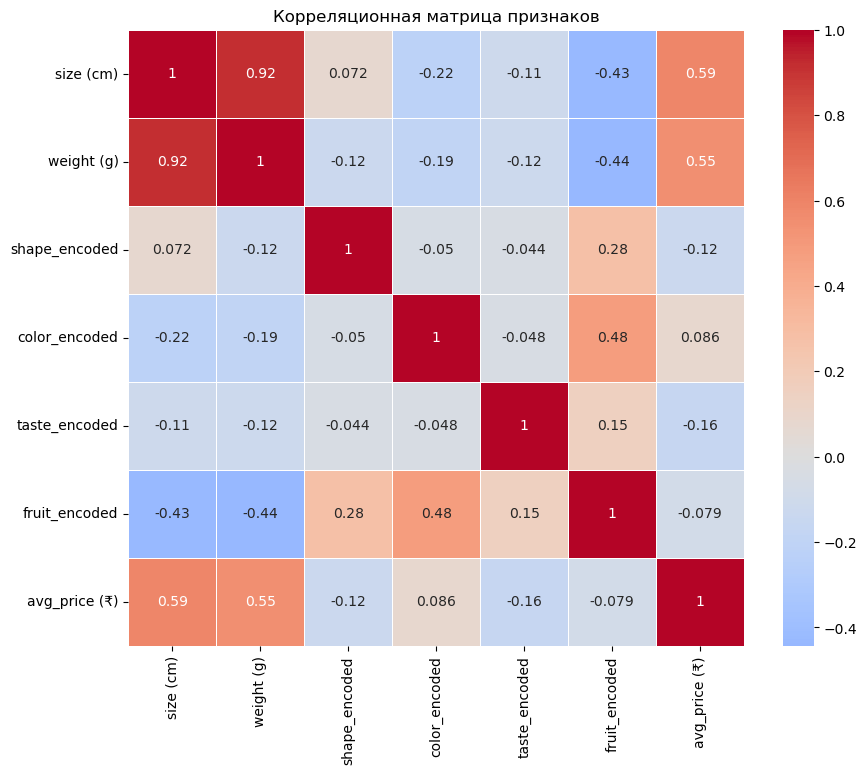

In [40]:
numerical_cols_for_corr = ['size (cm)', 'weight (g)',  'shape_encoded', 'color_encoded', 'taste_encoded', 'fruit_encoded', 'avg_price (₹)']
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

После построения тепловой карты, мы наблюдаем, какие признаки сильно коррелируют друг с другом.

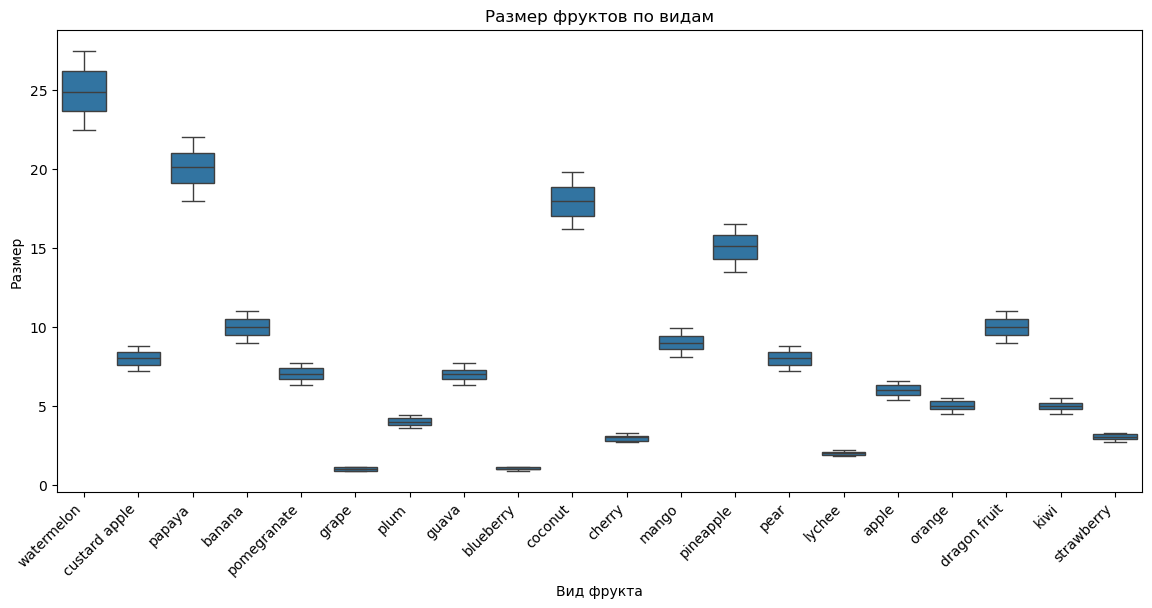

In [41]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='fruit_name', y='size (cm)')
plt.xticks(rotation=45, ha='right')
plt.title('Размер фруктов по видам')
plt.xlabel('Вид фрукта')
plt.ylabel('Размер')
plt.show()

Боксплот показывает медиану, выбросы и квартили.
Например, арбуз имеет размер гораздо больше, чем клубника.

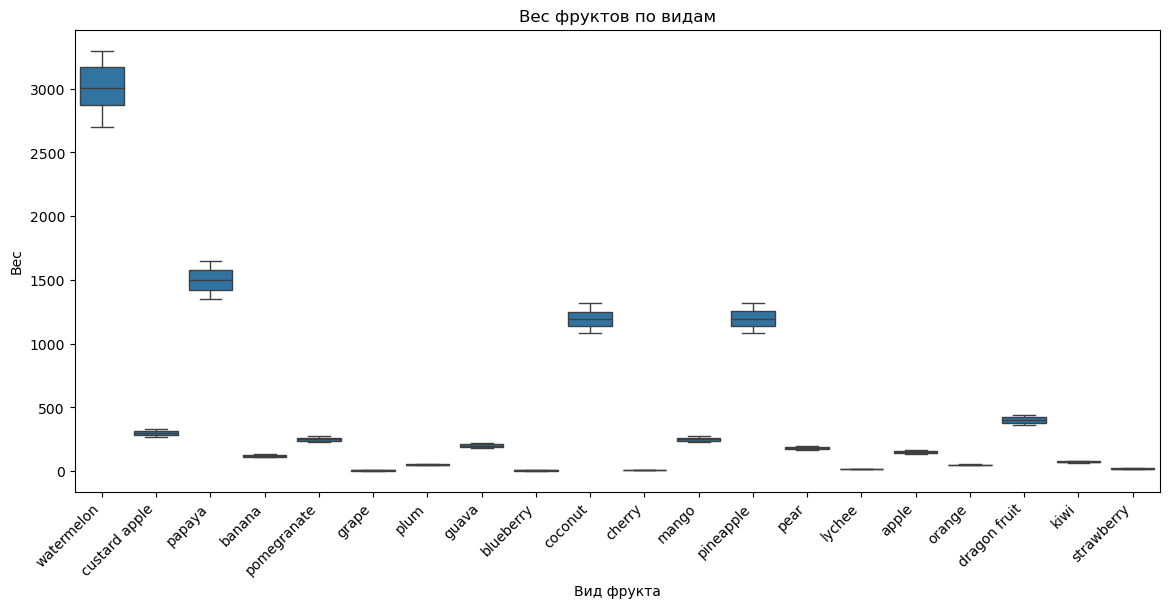

In [42]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='fruit_name', y='weight (g)')
plt.xticks(rotation=45, ha='right')
plt.title('Вес фруктов по видам')
plt.xlabel('Вид фрукта')
plt.ylabel('Вес')
plt.show()

По данному графику мы также можем заметить разницу в весе среди фруктов. Также, как пример, возьмем арбуз. Он весит намного больше, чем остальные фрукты.

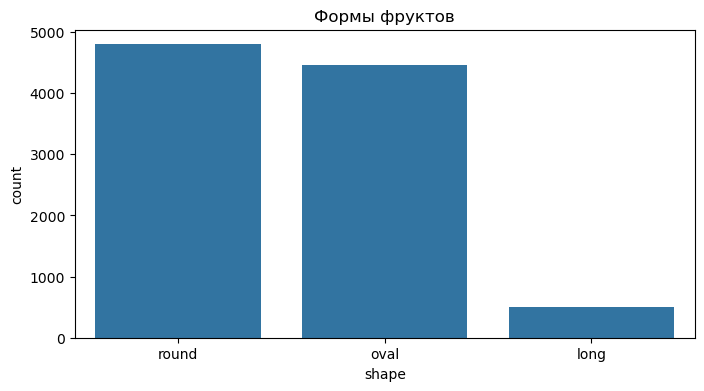

In [43]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='shape')
plt.title('Формы фруктов')
plt.show()

Чаще всего встречается круглая и овальная форма фруктов.

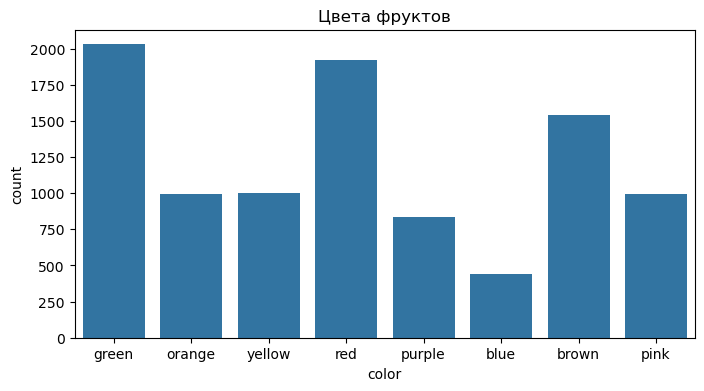

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='color')
plt.title('Цвета фруктов')
plt.show()

Самые частые цвета фруктов - зеленый, красный, коричневый.

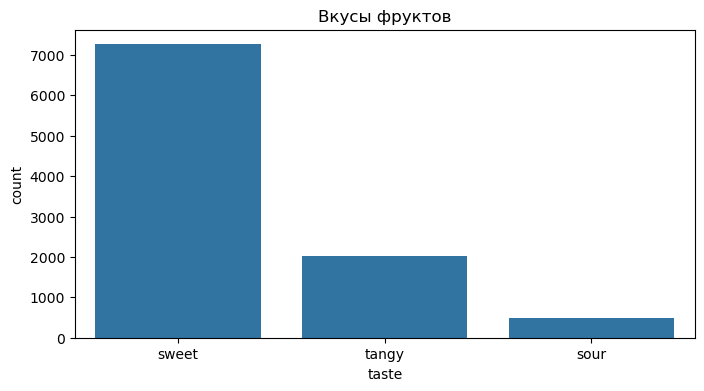

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='taste')
plt.title('Вкусы фруктов')
plt.show()

По вкусу больше всего встречаются сладкие фрукты.

# Обучение моделей

In [48]:
# Подготовка данных
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Признаки и целевая переменная
features = ['size (cm)_normalized', 'weight (g)_normalized', 'avg_price (₹)_normalized', 
           'shape_encoded_normalized', 'color_encoded_normalized', 'taste_encoded_normalized']
target = 'fruit_encoded'

X = df[features]
y = df[target]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (7803, 6)
Тестовая выборка: (1951, 6)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


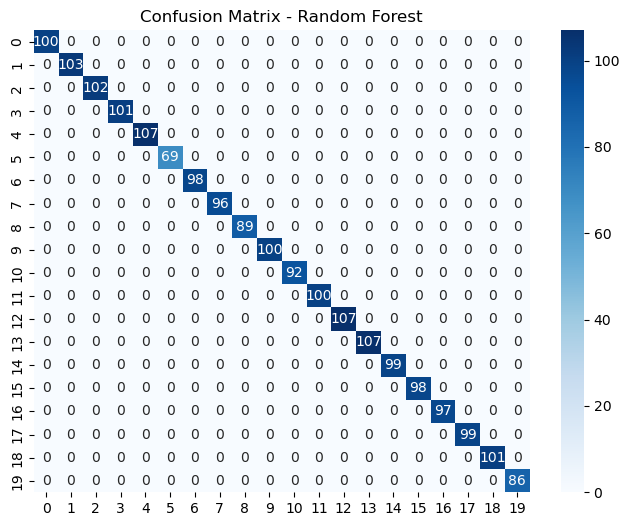

In [51]:
# Модель 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Метрики
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


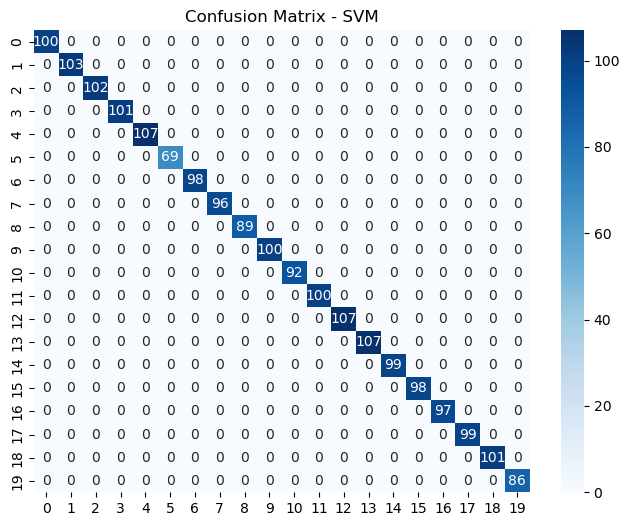

In [52]:
# Модель 2: SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Метрики
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-score: {svm_f1:.4f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


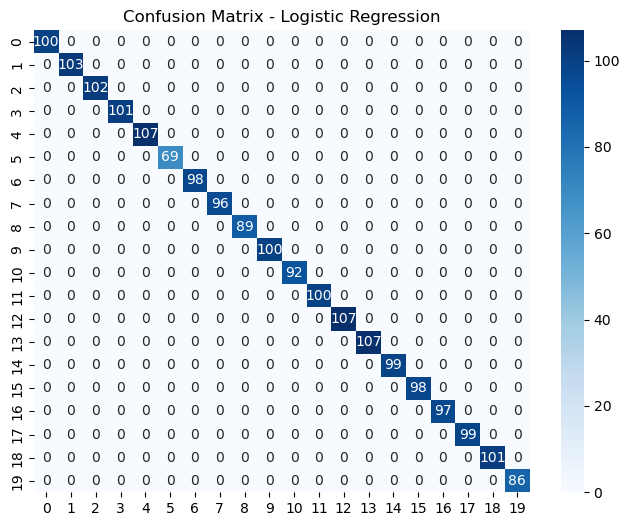

In [53]:
# Модель 3: Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Метрики
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")

# Матрица ошибок
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Сравнение моделей

                 Model  Accuracy  Precision  Recall  F1-score
0        Random Forest       1.0        1.0     1.0       1.0
1                  SVM       1.0        1.0     1.0       1.0
2  Logistic Regression       1.0        1.0     1.0       1.0


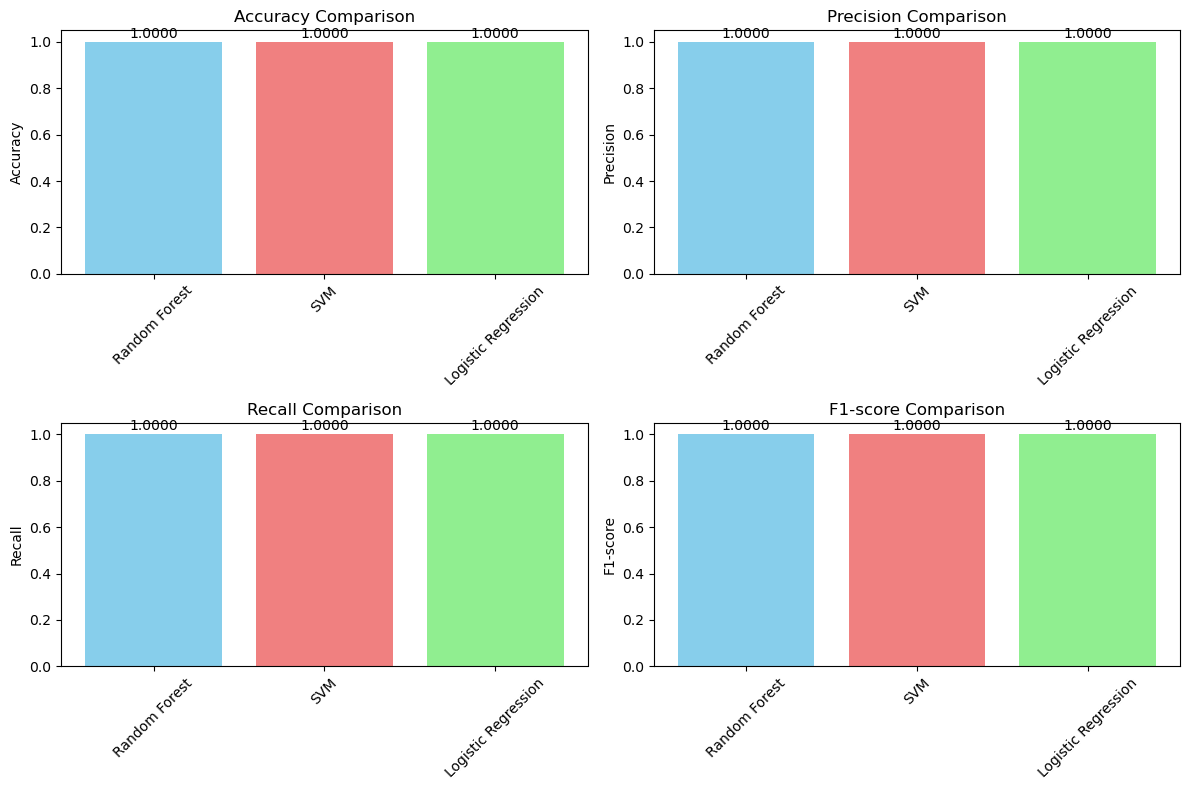


🏆 ЛУЧШАЯ МОДЕЛЬ: Random Forest с точностью 1.0000


In [54]:
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, lr_recall],
    'F1-score': [rf_f1, svm_f1, lr_f1]
})

print(models_comparison)

# Визуализация сравнения
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    bars = axes[row, col].bar(models_comparison['Model'], models_comparison[metric], 
                             color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Добавление значений на столбцы
    for bar, value in zip(bars, models_comparison[metric]):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                           f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Определение лучшей модели
best_model_idx = models_comparison['Accuracy'].idxmax()
best_model_name = models_comparison.loc[best_model_idx, 'Model']
best_model_accuracy = models_comparison.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name} с точностью {best_model_accuracy:.4f}")